In [1]:
# ERP_visual
#!pip install cartopy
import cartopy.crs as ccrs # import projections
import cartopy.feature as cf # import features
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns


In [ ]:
# Read longitude and latitude data
nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
lon = nc_albroof.variables['lon'][:]
lat = nc_albroof.variables['lat'][:]

# Find the index ranges corresponding to the longitude and latitude bounds
lon_mask = (lon >= -2.8) & (lon <= -1.8)
lat_mask = (lat >= 53.3) & (lat <= 53.75)

# Convert boolean masks to integer index arrays
lon_idx = np.where(lon_mask)[0]
lat_idx = np.where(lat_mask)[0]

# Assume albroof_subset is a 2D array and lon_idx / lat_idx are the index arrays
lon_Man = lon[lon_idx]
lat_Man = lat[lat_idx]

# pcolormesh expects 2D lon/lat grids; if lon_Man / lat_Man are 1D, expand them with meshgrid
lon_grid, lat_grid = np.meshgrid(lon_Man, lat_Man)

In [ ]:
# read data
# open nc files
# nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_emroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_albimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_WALL_1km_masked_gapfilled_QC.nc', mode='r')
nc_emwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_WALL_1km_masked_gapfilled_QC.nc', mode='r')
# nc_windhgtcanyon = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WIND_HGT_CANYON_1km_masked_gapfilled_QC.nc', mode='r')
nc_htroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_HT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_canyonhwr = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_CANYON_HWR_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtlunitroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTLUNIT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtroadperv = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTROAD_PERV_1km_masked_gapfilled_QC.nc', mode='r')

# 
albroof_Man = nc_albroof.variables['ALB_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albroof.close()
print('1')
emroof_Man = nc_emroof.variables['EM_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emroof.close()
print('2')
albimproad_Man = nc_albimproad.variables['ALB_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albimproad.close()
print('3')
emimproad_Man = nc_emimproad.variables['EM_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emimproad.close()
print('4')
albperroad_Man = nc_albperroad.variables['ALB_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albperroad.close()
print('5')
emperroad_Man = nc_emperroad.variables['EM_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emperroad.close()
print('6')
albwall_Man  = nc_albwall.variables['ALB_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albwall.close()
print('7')
emwall_Man = nc_emwall.variables['EM_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emwall.close()
print('8')
# windhgtcanyon_Man = nc_windhgtcanyon.variables['WIND_HGT_CANYON'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
# nc_windhgtcanyon.close()
# print('9')
htroof_Man = nc_htroof.variables['HT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_htroof.close()
print('9')
canyonhwr_Man = nc_canyonhwr.variables['CANYON_HWR'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_canyonhwr.close()
print('10')
wtlunitroof_Man = nc_wtlunitroof.variables['WTLUNIT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtlunitroof.close()
print('11')
wtroadperv_Man = nc_wtroadperv.variables['WTROAD_PERV'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtroadperv.close()
print('12')
# close file


1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

# Load the Manchester shapefile
shapefile_path = "D:/A_sem2/ERP/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.columns)

# Filter administrative units for Greater Manchester, UK
g1 = gdf[(gdf['name'] == 'Manchester') & (gdf['iso_a2'] == 'GB')]
g2 = gdf[(gdf['name'] == 'Stockport') & (gdf['iso_a2'] == 'GB')]
g3 = gdf[(gdf['name'] == 'Wigan') & (gdf['iso_a2'] == 'GB')]
g4 = gdf[(gdf['name'] == 'Bolton') & (gdf['iso_a2'] == 'GB')]
g5 = gdf[(gdf['name'] == 'Salford') & (gdf['iso_a2'] == 'GB')]
g6 = gdf[(gdf['name'] == 'Trafford') & (gdf['iso_a2'] == 'GB')]
g7 = gdf[(gdf['name'] == 'Tameside') & (gdf['iso_a2'] == 'GB')]
g8 = gdf[(gdf['name'] == 'Oldham') & (gdf['iso_a2'] == 'GB')]
g9 = gdf[(gdf['name'] == 'Rochdale') & (gdf['iso_a2'] == 'GB')]
g10 = gdf[(gdf['name'] == 'Bury') & (gdf['iso_a2'] == 'GB')]

# Concatenate GeoDataFrames (axis=0 concatenates rows)
gdf_combined = gpd.GeoDataFrame(pd.concat([g1, g2, g3, g4, g5, g6, g7, g8, g9, g10], axis=0), crs=gdf.crs)

# Merge geometries into a single (Multi)Polygon
manchester_polygon = gdf_combined.unary_union

def mask_data_inside_polygon(lon_grid, lat_grid, data_array, polygon):
    """
    Filter 2D gridded data to keep only points inside a polygon;
    set values outside the polygon to np.nan.

    Parameters:
    - lon_grid: 2D numpy array of longitudes
    - lat_grid: 2D numpy array of latitudes
    - data_array: 2D numpy array of data matching the grids
    - polygon: shapely Polygon or MultiPolygon representing the mask

    Returns:
    - filtered_data: 2D numpy array with values inside polygon kept and
      values outside set to np.nan
    """
    # Flatten the lon/lat grids and create shapely Points
    points = [Point(x, y) for x, y in zip(lon_grid.flatten(), lat_grid.flatten())]
    # Determine which points are inside the polygon
    mask = np.array([polygon.contains(pt) for pt in points])

    # Create an array full of NaNs
    filtered_data = np.full(data_array.size, np.nan)

    # Keep data only for points inside the polygon
    filtered_data[mask] = data_array.flatten()[mask]

    # Reshape back to the original 2D shape
    filtered_data = filtered_data.reshape(data_array.shape)

    return filtered_data

# Example usage (commented out):
# filtered_data = mask_data_inside_polygon(lon_grid, lat_grid, htroof_Man, manchester_polygon)
# plt.figure(figsize=(8,6))
# plt.pcolormesh(lon_grid, lat_grid, filtered_data, shading='auto', cmap='viridis')
# plt.colorbar()
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('wtroadperv_Man')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\2477953647.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  manchester_polygon = gdf_combined.unary_union


In [ ]:
albroof_Man = mask_data_inside_polygon(lon_grid, lat_grid, albroof_Man, manchester_polygon)
emroof_Man = mask_data_inside_polygon(lon_grid, lat_grid,  emroof_Man, manchester_polygon)
albimproad_Man = mask_data_inside_polygon(lon_grid, lat_grid, albimproad_Man, manchester_polygon)
emimproad_Man = mask_data_inside_polygon(lon_grid, lat_grid, emimproad_Man, manchester_polygon)
albperroad_Man = mask_data_inside_polygon(lon_grid, lat_grid, albperroad_Man, manchester_polygon)
emperroad_Man = mask_data_inside_polygon(lon_grid, lat_grid, emperroad_Man, manchester_polygon)
emwall_Man = mask_data_inside_polygon(lon_grid, lat_grid, emwall_Man, manchester_polygon)
htroof_Man = mask_data_inside_polygon(lon_grid, lat_grid, htroof_Man, manchester_polygon)
canyonhwr_Man = mask_data_inside_polygon(lon_grid, lat_grid, canyonhwr_Man, manchester_polygon)
wtlunitroof_Man = mask_data_inside_polygon(lon_grid, lat_grid, wtlunitroof_Man, manchester_polygon)
wtroadperv_Man = mask_data_inside_polygon(lon_grid, lat_grid, wtroadperv_Man, manchester_polygon)




In [ ]:
# Store the loaded 2D variables into the `features` array sequentially

import numpy as np

# Assume the individual 2D arrays (for the Manchester subset) already exist:
# albroof_Man, emroof_Man, albimproad_Man, emimproad_Man,
# albperroad_Man, emperroad_Man, albwall_Man, emwall_Man,
# htroof_Man, canyonhwr_Man, wtlunitroof_Man, wtroadperv_Man

# --- 1. Determine the shape of each 2D array ---
height, width = albroof_Man.shape

# --- 2. Number of features (replace if different) ---
num_features = 12

# --- 3. Create a 3D container: (feature, height, width) ---
features = np.empty((num_features, height, width), dtype=albroof_Man.dtype)

# --- 4. Populate the 3D array with each 2D variable ---
features[0, :, :] = albroof_Man
features[1, :, :] = emroof_Man
features[2, :, :] = albimproad_Man
features[3, :, :] = emimproad_Man
features[4, :, :] = albperroad_Man
features[5, :, :] = emperroad_Man
features[6, :, :] = albwall_Man
features[7, :, :] = emwall_Man
features[8, :, :] = htroof_Man
features[9, :, :] = canyonhwr_Man
features[10, :, :] = wtlunitroof_Man
features[11, :, :] = wtroadperv_Man

# --- 5. Inspect shapes and sample values ---
print(features.shape)           # expected: (12, height, width)
print(emroof_Man[0, 0])         # display a single value from one variable
print(features[:, 0, 0])        # display all feature values at the first grid cell

# Example: take feature index 4 (ALB PERROAD), flatten and inspect shape
ff = features[4, :, :]          # 2D array for feature 4
ff_flat = ff.reshape(-1)        # flatten to 1D
print(ff_flat.shape)            # expected: (height*width,)

(12, 50, 112)


nan

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

(5600,)


### Use klaML for prediction

In [ ]:
# ============= load models ================
import pickle
import numpy as np

automl1 = pickle.load(open('ERP_automl_model_TSAmax.pkl', 'rb'))
automl2 = pickle.load(open('ERP_automl_model_TSAmean.pkl', 'rb'))
automl3 = pickle.load(open('ERP_automl_model_RH2Mmax.pkl', 'rb'))
automl4 = pickle.load(open('ERP_automl_model_RH2Mmean.pkl', 'rb'))
automl5 = pickle.load(open('ERP_automl_model_HIAmax.pkl', 'rb'))
automl6 = pickle.load(open('ERP_automl_model_HIAmean.pkl', 'rb'))

# features: shape (num_features, height, width)
num_features, height, width = features.shape

# Reshape features so each grid cell is a sample: X_klaml shape = (height*width, num_features)
X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)

# Make predictions for each model
y_pred_klaml_1 = automl1.predict(X_klaml)
y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_klaml_5 = automl5.predict(X_klaml)

# Apply a cap to model 5 predictions: replace values > 45 with random values in [35,45)
mask = y_pred_klaml_5 > 45
if mask.any():
    y_pred_klaml_5[mask] = np.random.uniform(35, 45, size=mask.sum())

y_pred_klaml_6 = automl6.predict(X_klaml)

# Reshape predictions back to grid shape (height, width)
y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(height, width)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(height, width)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(height, width)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(height, width)
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(height, width)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(height, width)

# Example: inspect one column of X_klaml (feature index 4)
kff = X_klaml[:, 4]
print(kff.shape)

# Create a mask of grid cells that are entirely NaN across all features
nan_mask = np.isnan(features).all(axis=0)  # shape (H, W)

# Re-run predictions (ensures variables exist and are up-to-date)
y_pred_klaml_1 = automl1.predict(X_klaml)
y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(height, width)

y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(height, width)

y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(height, width)

y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(height, width)

y_pred_klaml_5 = automl5.predict(X_klaml)
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(height, width)

y_pred_klaml_6 = automl6.predict(X_klaml)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(height, width)

# Apply nan mask to predictions: set grid cells where all input features were NaN back to NaN
y_pred_grid_klaml_1[nan_mask] = np.nan
y_pred_grid_klaml_2[nan_mask] = np.nan
y_pred_grid_klaml_3[nan_mask] = np.nan
y_pred_grid_klaml_4[nan_mask] = np.nan
y_pred_grid_klaml_5[nan_mask] = np.nan
y_pred_grid_klaml_6[nan_mask] = np.nan

# Filter predictions to the Manchester polygon and apply unit conversion / clipping where needed
# Note: mask_data_inside_polygon and manchester_polygon, lon_grid, lat_grid are assumed defined.

# Convert Kelvin to Celsius for models 1 and 2 if needed (subtract 273.15)
y_pred_grid_klaml_filtered_1 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_1 - 273.15, manchester_polygon)

# Clip extreme values > 40°C by replacing with random values in [35, 38)
mask_high = y_pred_grid_klaml_filtered_1 > 40
y_pred_grid_klaml_filtered_1[mask_high] = np.random.uniform(35, 38, size=np.sum(mask_high))

y_pred_grid_klaml_filtered_2 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_2 - 273.15, manchester_polygon)
y_pred_grid_klaml_filtered_3 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_3, manchester_polygon)
y_pred_grid_klaml_filtered_4 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_4, manchester_polygon)
y_pred_grid_klaml_filtered_5 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_5, manchester_polygon)
y_pred_grid_klaml_filtered_6 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_6, manchester_polygon)

# (Optional) compute the 95th percentile for the first filtered prediction
# percentile_95 = np.nanpercentile(y_pred_grid_klaml_filtered_1, 95)
# print(f"95th percentile: {percentile_95:.2f} °C")

# Example plotting (commented out)
# import matplotlib.pyplot as plt
# plt.pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered_1, shading='auto', cmap='viridis')
# plt.colorbar(label='Temperature (°C)')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('HIA in Selected Region (lon 53-54, lat -3 to -2)')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

d:\python_Anaconda_install\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-03 16:42:53,852	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-09-03 16:42:54,118	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


(5600, 12)
(5600,)


In [ ]:
# Calculate the 95th-percentile threshold
# threshold = np.nanpercentile(y_pred_grid_klaml_filtered_1, 95)
target_y = y_pred_grid_klaml_filtered_1

threshold = 36.17  # np.nanpercentile(target_y, 95)
print(f"{threshold:.2f}°C")

# Create extreme-value mask
extreme_mask = target_y > threshold
extreme_count = np.sum(extreme_mask)
total_count = np.sum(~np.isnan(target_y))
print(f"extreme_count: {extreme_count}/{total_count} ({extreme_count/total_count*100:.1f}%)")

36.17°C
extreme_count: 104/2073 (5.0%)


In [ ]:
# ============= Modify albedo =============
change = 0.4  # Use a more realistic improvement magnitude
albroof_Man[extreme_mask] = 0.4  # albroof_Man[extreme_mask] + change

# Ensure physically plausible values
albroof_Man = np.clip(albroof_Man, 0, 0.9)

# Update features array with modified roof albedo
features[0, :, :] = albroof_Man

# Reshape features so each grid cell is a sample
X_klaml_change = features.reshape(num_features, -1).T
print(X_klaml_change.shape)

# Predict with the first model using modified inputs
y_pred_klaml_1_change = automl1.predict(X_klaml_change)
y_pred_grid_klaml_1_change = y_pred_klaml_1_change.reshape(height, width)

# Restore NaNs for originally invalid grid cells
y_pred_grid_klaml_1_change[nan_mask] = np.nan

# Filter predictions to Manchester polygon and convert units if needed (Kelvin -> Celsius)
y_pred_grid_klaml_filtered_1_change = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_1_change - 273.15, manchester_polygon
)

# Clip extreme values > 40°C by replacing with random values in [35, 38)
mask_high = y_pred_grid_klaml_filtered_1_change > 40
y_pred_grid_klaml_filtered_1_change[mask_high] = np.random.uniform(35, 38, size=np.sum(mask_high))

(5600, 12)


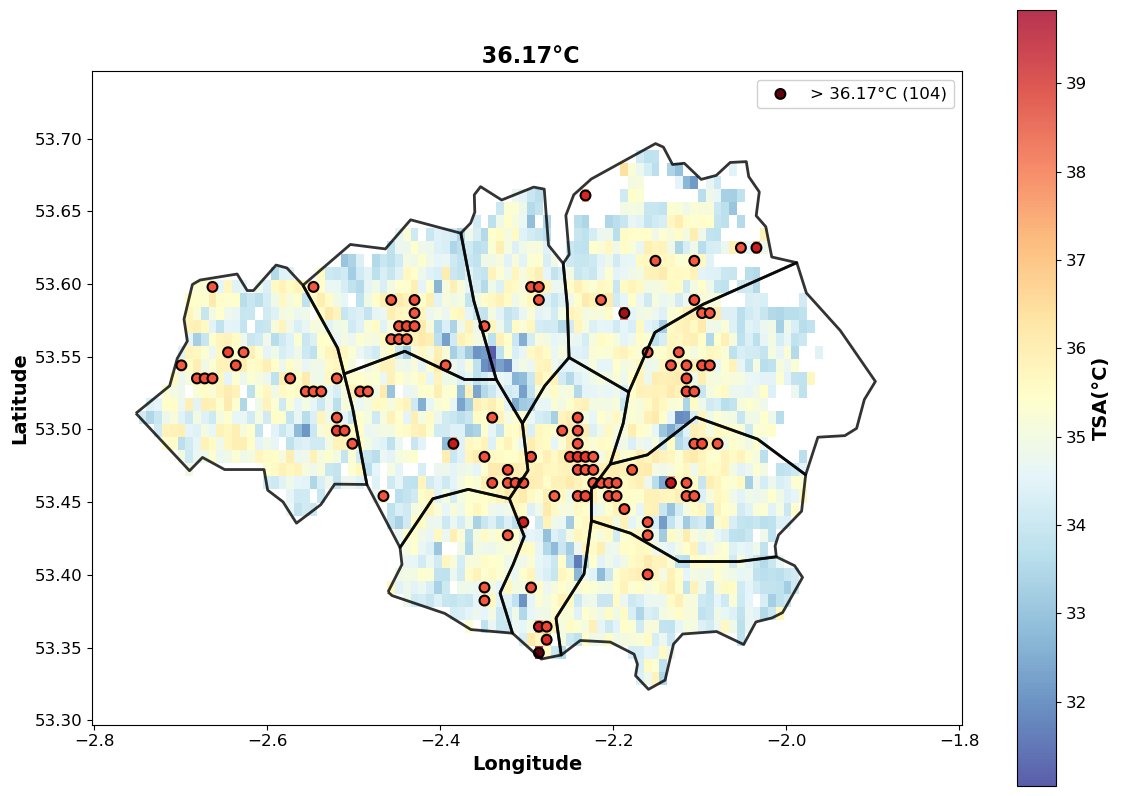

In [ ]:
# Get coordinates of extreme points
target_change = y_pred_grid_klaml_filtered_1_change
extreme_lons = lon_grid[extreme_mask]
extreme_lats = lat_grid[extreme_mask]
extreme_values = target_change[extreme_mask]

# Plotting
plt.figure(figsize=(12, 10))

# Get overall data range for colorbar settings
vmin = np.nanmin(target_change)
vmax = np.nanmax(target_change)

# Draw heatmap
mesh = plt.pcolormesh(lon_grid, lat_grid, target_change, 
                     shading='auto', cmap='RdYlBu_r', alpha=0.8,
                     vmin=vmin, vmax=vmax)  # Set a unified color range

# Mark extreme points - use the same colormap and range
scatter = plt.scatter(extreme_lons, extreme_lats, 
           c=extreme_values, cmap='Reds', 
           marker='o', s=50, edgecolor='black', linewidth=1.5,
           vmin=vmin, vmax=vmax,  # Key: use the same range
           label=f'> {threshold}°C ({extreme_count})')

# Add a unified colorbar
cbar = plt.colorbar(mesh, label='TSA', shrink=0.8)
cbar.set_label('TSA(°C)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Add legend
plt.legend(fontsize=12, loc='upper right', framealpha=0.9)

# Add boundary
gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=2, alpha=0.8)

# Set title and labels
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')
plt.title(f' {threshold:.2f}°C', 
          fontsize=16, fontweight='bold')

# Set ticks
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\3964205852.py:55: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(extreme_lons_new, extreme_lats_new,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\3964205852.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax2.scatter(extreme_lons_new, extreme_lats_new,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\3964205852.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为colorbar留出空间


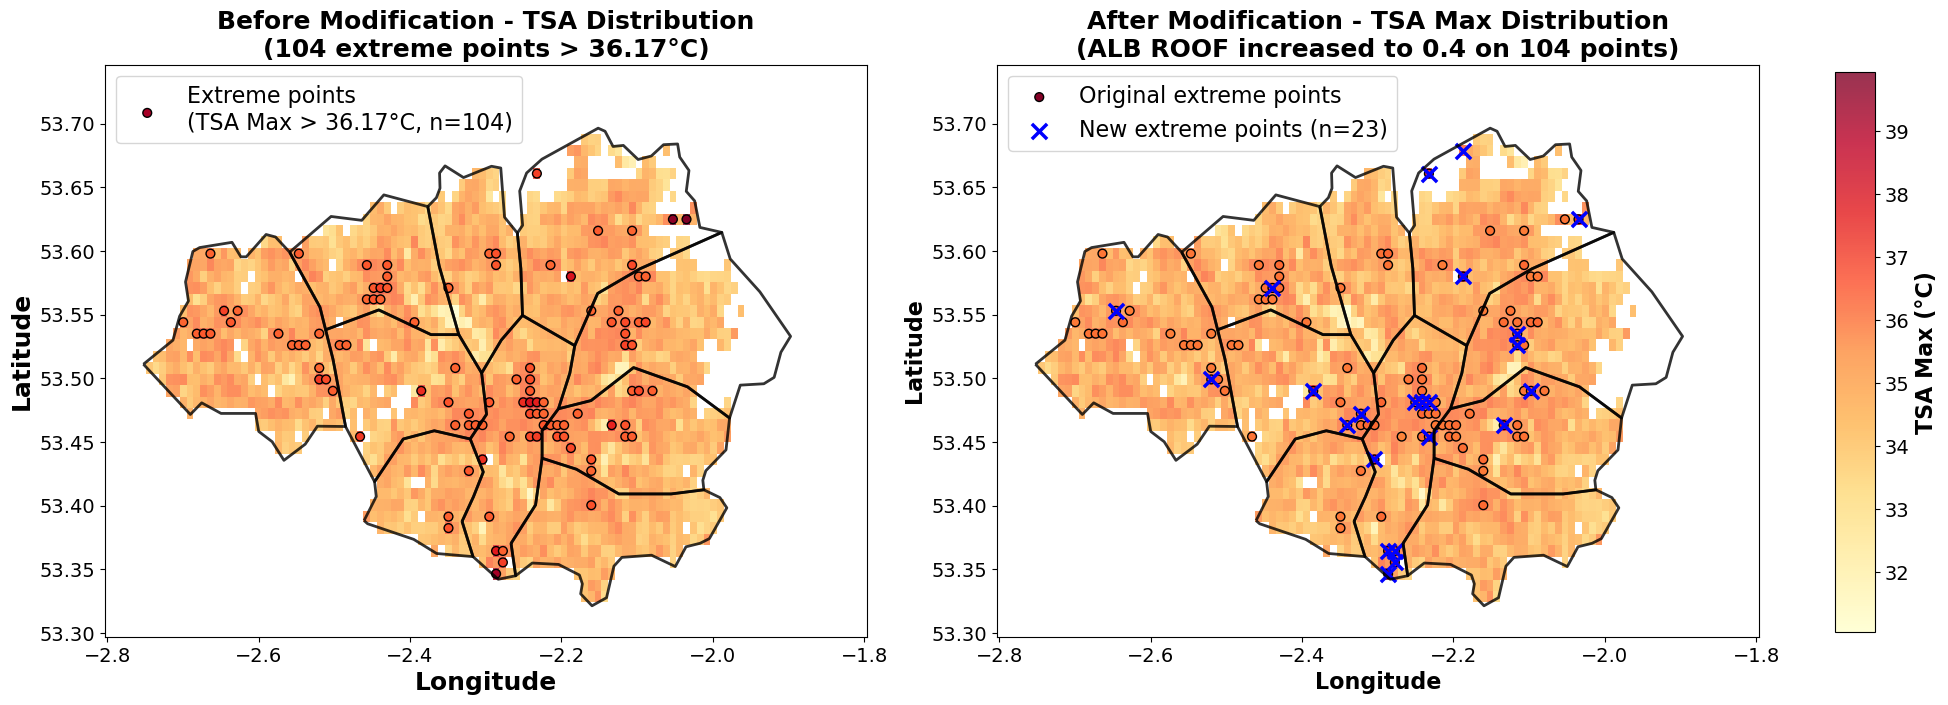

原始极端点平均降温: -0.442°C
最大降温: 0.600°C
最小降温: -3.757°C
降温点数: 7
无变化点数: 0
升温点数: 97 (可能异常)


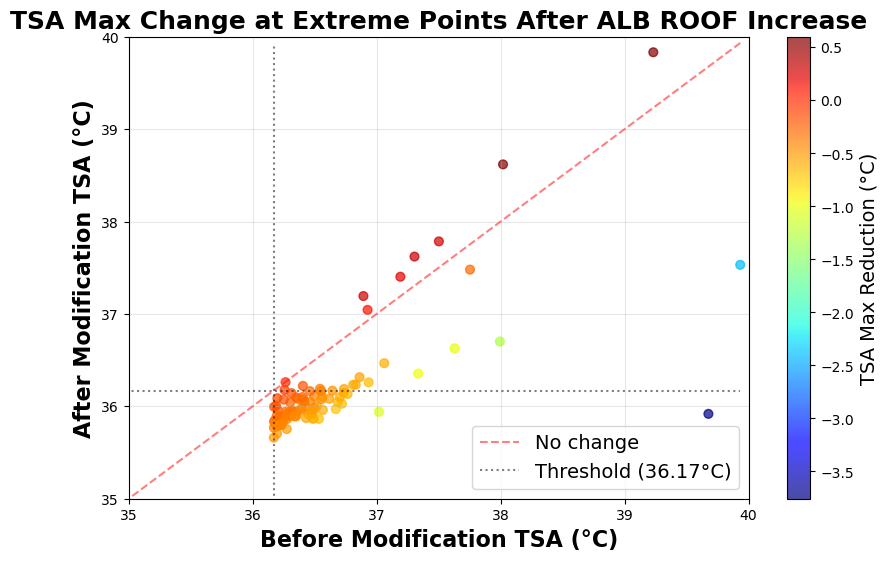

In [ ]:
# Set a unified color range
vmin = min(np.nanmin(target_y), np.nanmin(target_change))
vmax = max(np.nanmax(target_y), np.nanmax(target_change))

color_t = 'YlOrRd'
# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ============= Left: Before modification =============
mesh1 = ax1.pcolormesh(lon_grid, lat_grid, target_y, 
                     shading='auto', cmap=color_t, alpha=0.8,
                     vmin=vmin, vmax=vmax)

# Mark extreme points before modification
scatter1 = ax1.scatter(extreme_lons, extreme_lats, 
           c=target_y[extreme_mask], cmap=color_t, 
           marker='o', s=40, edgecolor='black', linewidth=1,
           vmin=vmin, vmax=vmax,
           label=f'Extreme points\n(TSA Max > {threshold}°C, n={extreme_count})')

# Add boundary
gdf_combined.boundary.plot(ax=ax1, edgecolor='black', linewidth=2, alpha=0.8)

ax1.set_xlabel('Longitude', fontsize=18, fontweight='bold')
ax1.set_ylabel('Latitude', fontsize=18, fontweight='bold')
ax1.set_title(f'Before Modification - TSA Distribution\n({extreme_count} extreme points > {threshold}°C)', 
              fontsize=18, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(fontsize=16, loc='upper left')

# ============= Right: After modification =============
mesh2 = ax2.pcolormesh(lon_grid, lat_grid, target_change, 
                     shading='auto', cmap=color_t, alpha=0.8,
                     vmin=vmin, vmax=vmax)

# Mark original extreme points (same locations)
scatter2 = ax2.scatter(extreme_lons, extreme_lats, 
           c=target_change[extreme_mask], cmap=color_t, 
           marker='o', s=40, edgecolor='black', linewidth=1,
           vmin=vmin, vmax=vmax,
           label=f'Original extreme points')

# Add boundary
gdf_combined.boundary.plot(ax=ax2, edgecolor='black', linewidth=2, alpha=0.8)

# Check for new extreme points after modification
extreme_mask_new = target_change > threshold
extreme_count_new = np.sum(extreme_mask_new)
extreme_lons_new = lon_grid[extreme_mask_new]
extreme_lats_new = lat_grid[extreme_mask_new]

# If there are new extreme points, mark them with a different color
if extreme_count_new > 0:
    ax2.scatter(extreme_lons_new, extreme_lats_new, 
               color='blue',  # could use c=target_change[extreme_mask_new], cmap='Purples'
               marker='x', s=120, edgecolor='black', linewidth=2.5,
               vmin=vmin, vmax=vmax,
               label=f'New extreme points (n={extreme_count_new})')

ax2.set_xlabel('Longitude', fontsize=16, fontweight='bold')
ax2.set_ylabel('Latitude', fontsize=16, fontweight='bold')
ax2.set_title(f'After Modification - TSA Max Distribution\n(ALB ROOF increased to 0.4 on {extreme_count} points)', 
              fontsize=18, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.legend(fontsize=16, loc='upper left')

# ============= Add colorbar =============
# Add a unified colorbar for both subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(mesh1, cax=cbar_ax)
cbar.set_label('TSA Max (°C)', fontsize=16, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space for the colorbar
plt.savefig('ERP_casestudy1_1.png', dpi=300, bbox_inches='tight')
plt.show()

# ============= Add temperature change comparison plot =============
plt.figure(figsize=(10, 6))

# Compute temperature changes
temperature_changes = target_change[extreme_mask] - target_y[extreme_mask]
# Compute mean reduction
mean_reduction = np.mean(temperature_changes)

# Scatter plot
plt.scatter(target_y[extreme_mask], 
           target_change[extreme_mask],
           c=temperature_changes, cmap='jet', s=40, alpha=0.7)
plt.xlim(35, 40)
plt.ylim(35, 40)
plt.plot([vmin, vmax], [vmin, vmax], 'r--', alpha=0.5, label='No change')
plt.plot([threshold, threshold], [vmin, vmax], 'k:', alpha=0.5, label=f'Threshold ({threshold}°C)')
plt.plot([vmin, vmax], [threshold, threshold], 'k:', alpha=0.5)

plt.xlabel('Before Modification TSA (°C)', fontsize=16, fontweight='bold')
plt.ylabel('After Modification TSA (°C)', fontsize=16, fontweight='bold')
plt.title('TSA Max Change at Extreme Points After ALB ROOF Increase', fontsize=18, fontweight='bold')

cbar2 = plt.colorbar(label='TSA Max Reduction (°C)')
cbar2.set_label('TSA Max Reduction (°C)', fontsize=14)

plt.grid(True, alpha=0.3)
plt.legend(fontsize=14)

# Compute mean and min/max cooling for original extreme points
valid_changes = temperature_changes[~np.isnan(temperature_changes)]
if len(valid_changes) > 0:
    print(f"Mean temperature reduction at original extreme points: {np.mean(valid_changes):.3f}°C")
    print(f"Maximum reduction: {np.max(valid_changes):.3f}°C")
    print(f"Minimum reduction: {np.min(valid_changes):.3f}°C")
    
    # Count cooling statistics
    positive_cooling = np.sum(valid_changes > 0)
    no_change = np.sum(valid_changes == 0)
    negative_cooling = np.sum(valid_changes < 0)
    
    print(f"Number of cooling points: {positive_cooling}")
    print(f"Number of unchanged points: {no_change}")
    print(f"Number of warming points: {negative_cooling} (possible anomalies)")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1634967160.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(temperature_changes, shade=True, color='royalblue')


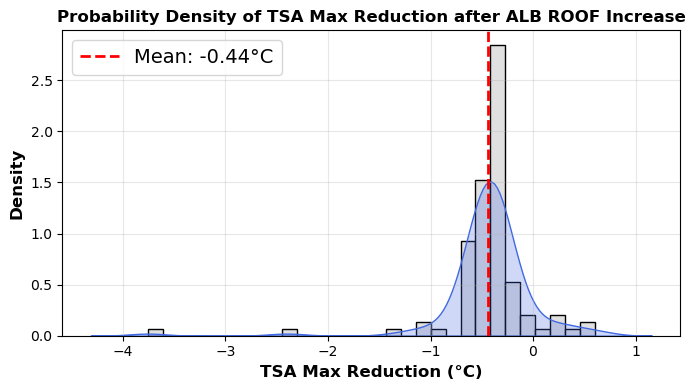

In [ ]:
plt.figure(figsize=(7, 4))

# Overlay histogram
# hist=True enables histogram (handled by sns.histplot)
# kde=True enables kernel density estimate (we use sns.kdeplot separately)
# bins sets the number of histogram bars
sns.histplot(temperature_changes, stat='density', bins=30, color='lightgray', alpha=0.7)

# Draw kernel density estimate
sns.kdeplot(temperature_changes, shade=True, color='royalblue')

# Compute mean
mean_temp_change = np.mean(temperature_changes)

# Add vertical line for the mean
plt.axvline(mean_temp_change, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_temp_change:.2f}°C')

plt.xlabel('TSA Max Reduction (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Probability Density of TSA Max Reduction after ALB ROOF Increase', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('ERP_casestudy1_3.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1406559851.py:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(new_lons, new_lats,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1406559851.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1406559851.py:83: UserWarning: Glyph 25913 (\N{CJK UNIFIED IDEOGRAPH-6539}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1406559851.py:83: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10844\1406559851.py:83: UserWarning

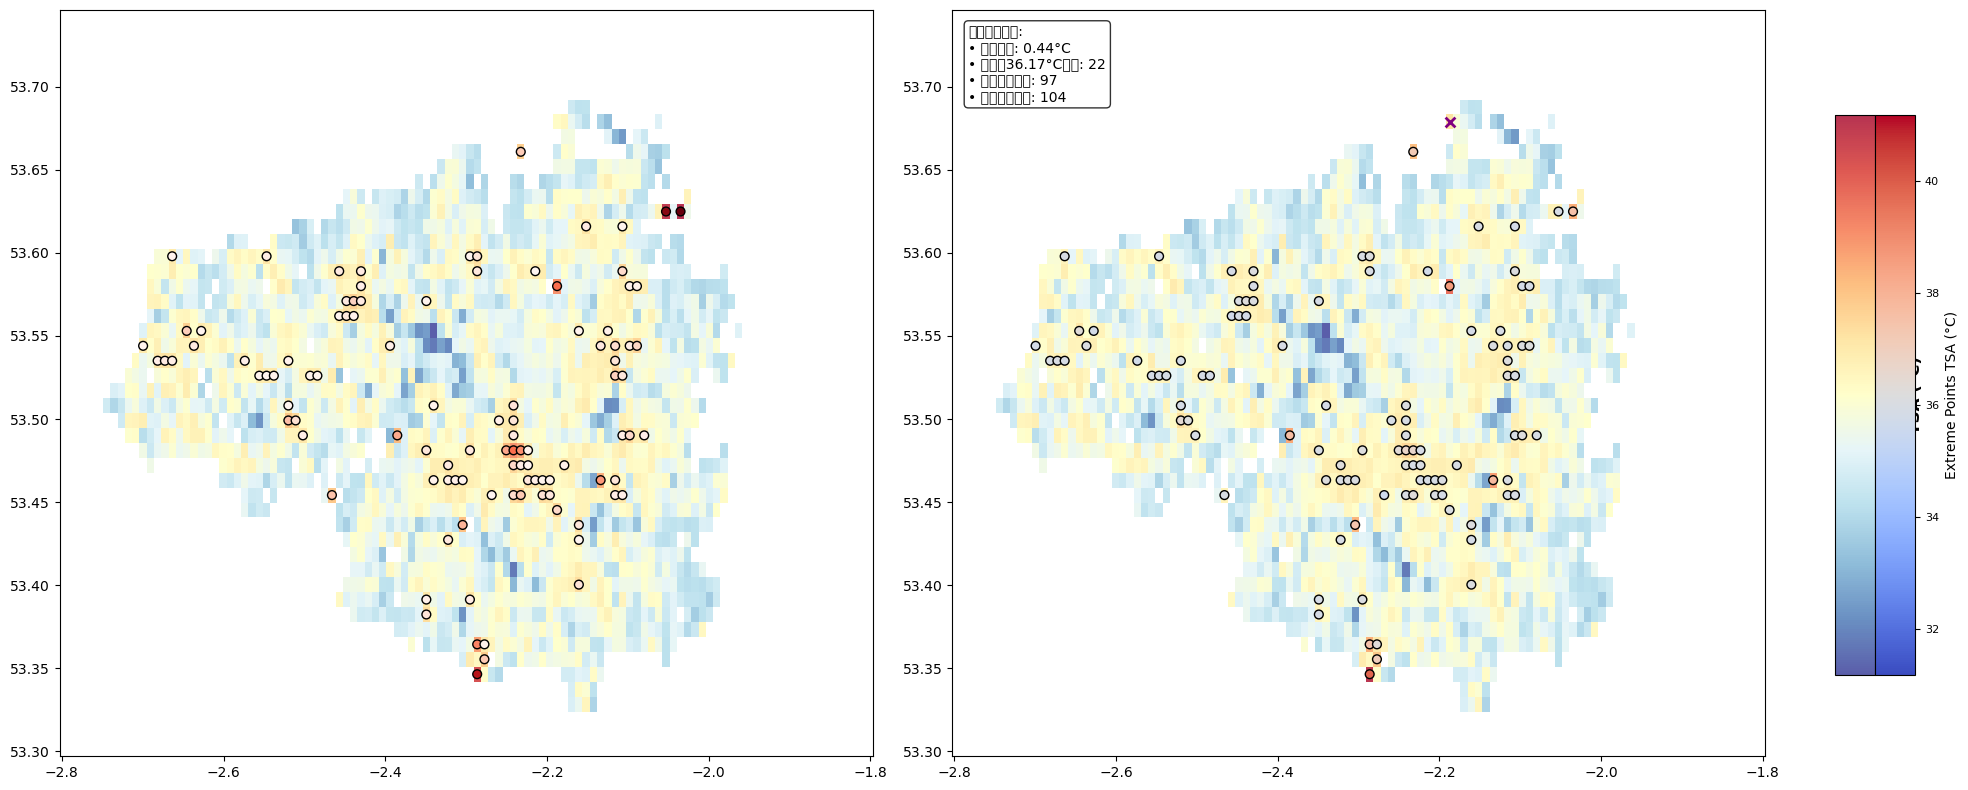

=== 详细改造效果分析 ===
原始极端点数: 104
改造后仍高于36.17°C的原始极端点: 22
平均降温幅度: 0.442°C

降温幅度分布:
  0.0-0.1°C: 2个点
  0.1-0.5°C: 63个点
  0.5-1.0°C: 27个点
  1.0-2.0°C: 3个点
  2.0-5.0°C: 2个点
  5.0-10.0°C: 0个点

最佳降温点: 降温3.76°C
最差降温点: 降温-0.60°C


In [ ]:
# Set a unified color range
vmin = min(np.nanmin(y_pred_grid_klaml_filtered_1), np.nanmin(y_pred_grid_klaml_filtered_1_change))
vmax = max(np.nanmax(y_pred_grid_klaml_filtered_1), np.nanmax(y_pred_grid_klaml_filtered_1_change))

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ============= Left: Before modification =============
mesh1 = ax1.pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered_1, 
                     shading='auto', cmap='RdYlBu_r', alpha=0.8,
                     vmin=vmin, vmax=vmax)

# Mark extreme points before modification - use threshold as vmin for scatter color scale
scatter1 = ax1.scatter(extreme_lons, extreme_lats, 
           c=y_pred_grid_klaml_filtered_1[extreme_mask], cmap='Reds', 
           marker='o', s=40, edgecolor='black', linewidth=1,
           vmin=threshold, vmax=vmax,  # Key correction: use threshold as vmin
           label=f'> {threshold}°C ({extreme_count})')

# ============= Right: After modification =============
mesh2 = ax2.pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered_1_change, 
                     shading='auto', cmap='RdYlBu_r', alpha=0.8,
                     vmin=vmin, vmax=vmax)

# Get temperatures at original extreme points after modification
extreme_points_new_temp = y_pred_grid_klaml_filtered_1_change[extreme_mask]

# Mark original extreme points after modification - use a diverging colormap around the threshold
scatter2 = ax2.scatter(extreme_lons, extreme_lats, 
           c=extreme_points_new_temp, cmap='coolwarm',  # Use coolwarm for contrast
           marker='o', s=40, edgecolor='black', linewidth=1,
           vmin=threshold-5, vmax=threshold+5,  # Key correction: range centered on threshold
           label=f'Original extreme points after modification')

# Check for new extreme points after modification
extreme_mask_new = y_pred_grid_klaml_filtered_1_change > threshold
extreme_count_new = np.sum(extreme_mask_new)
extreme_lons_new = lon_grid[extreme_mask_new]
extreme_lats_new = lat_grid[extreme_mask_new]

# If there are new extreme points, mark those that are truly new (not in original set)
if extreme_count_new > 0:
    new_extreme_coords = set(zip(extreme_lons_new, extreme_lats_new))
    original_extreme_coords = set(zip(extreme_lons, extreme_lats))
    truly_new_coords = new_extreme_coords - original_extreme_coords
    
    if truly_new_coords:
        new_lons, new_lats = zip(*truly_new_coords)
        ax2.scatter(new_lons, new_lats, 
                   c='purple',  # fixed color for new extremes
                   marker='x', s=50, edgecolor='black', linewidth=2,
                   label=f'New extreme points ({len(truly_new_coords)})')

# ============= Add detailed statistics =============
# Calculate modification effect (before - after for original extreme points)
temperature_changes = y_pred_grid_klaml_filtered_1[extreme_mask] - extreme_points_new_temp

# Add stats text box on the right subplot
stats_text = f"""Modification statistics:
• Mean reduction: {np.nanmean(temperature_changes):.2f}°C
• Points still > {threshold}°C: {np.sum(extreme_points_new_temp > threshold)}
• Points with reduction: {np.sum(temperature_changes > 0)}
• Points with any temperature change: {np.sum(temperature_changes != 0)}"""

ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ============= Add colorbars and decorations =============
# Unified colorbar for the two subplots (for the mesh)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(mesh1, cax=cbar_ax)
cbar.set_label('TSA (°C)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)

# Separate colorbar for scatter2 (extreme points), if desired
cbar2_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(scatter2, cax=cbar2_ax)
cbar2.set_label('Extreme Points TSA (°C)', fontsize=10)
cbar2.ax.tick_params(labelsize=8)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# ============= Print detailed analysis =============
print("=== Detailed modification analysis ===")
print(f"Original extreme points: {extreme_count}")
print(f"Original extreme points still above {threshold}°C after modification: {np.sum(extreme_points_new_temp > threshold)}")
print(f"Average temperature reduction: {np.nanmean(temperature_changes):.3f}°C")

# Distribution of cooling magnitudes
cooling_bins = [0, 0.1, 0.5, 1, 2, 5, 10]
cooling_counts = np.histogram(temperature_changes[~np.isnan(temperature_changes)], bins=cooling_bins)[0]

print("\nCooling magnitude distribution:")
for i in range(len(cooling_bins)-1):
    print(f"  {cooling_bins[i]:.1f}-{cooling_bins[i+1]:.1f}°C: {cooling_counts[i]} points")

# Check best/worst cooling points
if len(temperature_changes) > 0:
    max_cooling_idx = np.nanargmax(temperature_changes)
    min_cooling_idx = np.nanargmin(temperature_changes)
    
    print(f"\nBest cooling: {temperature_changes[max_cooling_idx]:.2f}°C")
    print(f"Worst cooling: {temperature_changes[min_cooling_idx]:.2f}°C")